In [2]:
%matplotlib inline

import numpy
import pandas
from matplotlib import pyplot as plt

import acoustics

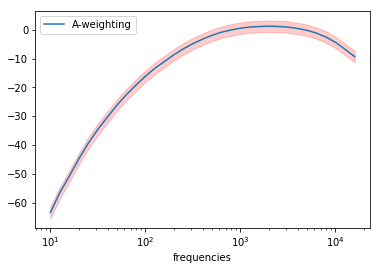

In [15]:
freq = pandas.DataFrame({
    'A-weighting': acoustics.weighting.THIRD_OCTAVE_A_WEIGHTING,
    'frequencies': acoustics.bands.THIRD_OCTAVE_CENTER_FREQUENCIES[:-1],
})
p = freq.plot(x='frequencies', logx=True) 
p.fill_between(freq.frequencies, freq['A-weighting']-2.0, freq['A-weighting']+2.0, alpha=0.2, color='r')

Text(0.5, 0, 'Frequency [Hz]')

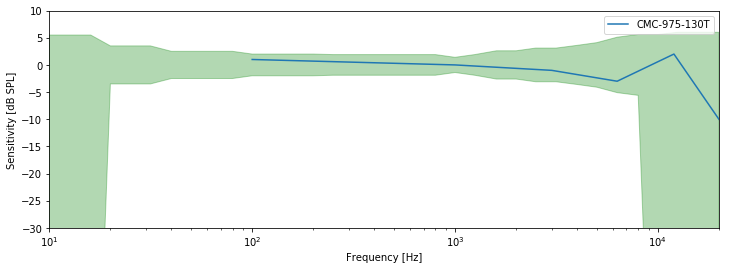

In [55]:
t = pandas.read_csv('class2tolerances.csv')
mic = pandas.read_csv('cmc-975-130t-response.csv')
mic['CMC-975-130T'] = mic.sensitivity+43
ax = mic.plot(x='frequency', y='CMC-975-130T',
              logx=True, ylim=(-30,10), xlim=(10,20000), figsize=(12,4),
             )
ax.fill_between(t.frequency, t.lower, t.upper, alpha=0.3, color='g')
ax.set_ylabel('Sensitivity [dB SPL]')
ax.set_xlabel('Frequency [Hz]')

In [3]:
bom = pandas.read_csv('bom.csv')
bom.head(1)

,function,part,price,ref,alt
0,microcontroller,STM32L471,6,https://octopart.com/search?q=STM32L471&start=...,NaN


In [11]:
(bom.price.sum()) * 9

756

In [9]:
pres = bom[['function','part', 'price']]
pres = pres.rename(columns={'price': 'USD'})
pres.fillna('')

,function,part,USD
0,microcontroller,STM32L471,6
1,microphone,CMC-9745-130T,3
2,amplifier,,3
3,modem,SARA-G350-02 w/SIM,16
4,batteries,4x18650,12
5,charger,,4
6,pcb,PCB incl assembly,10
7,connectors,,10
8,enclosure,,20
